In [431]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading
We begin by loading the dataset containing information about customer transactions, including details such as age, gender, product category, quantity purchased, and total spending.


In [447]:
# Load the dataset and display the first few rows
data = pd.read_csv('retail_sales_dataset.csv') 
data.head()  


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## Data Cleaning
To ensure the dataset is clean and ready for analysis, we will:
- Convert the 'Date' column to datetime format.
- Categorize the customers into different age groups for easier analysis.


In [448]:
# Convert 'Date' column to datetime format for accurate time-based analysis
data['Date'] = pd.to_datetime(data['Date'])

# Define age groups for better segmentation of customers
bins = [18, 24, 44, 64]
labels = ['18-24', '25-44', '45-64']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)


### **2. Descriptive Statistics**

We calculated basic descriptive statistics to understand the distribution of numeric columns like `Quantity`, `Price per Unit`, and `Total Amount`.

In [449]:
# Basic descriptive statistics
descriptive_stats = data[['Quantity', 'Price per Unit', 'Total Amount']].describe()
descriptive_stats

,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.000000,1000.000000
mean,2.514000,179.890000,456.000000
std,1.132734,189.681356,559.997632
min,1.000000,25.000000,25.000000
25%,1.000000,30.000000,60.000000
50%,3.000000,50.000000,135.000000
75%,4.000000,300.000000,900.000000
max,4.000000,500.000000,2000.000000


In [450]:
# Mean, Median, Mode, Standard Deviation
mean_values = data[['Quantity', 'Price per Unit', 'Total Amount']].mean()
median_values = data[['Quantity', 'Price per Unit', 'Total Amount']].median()
mode_values = data[['Quantity', 'Price per Unit', 'Total Amount']].mode()
std_values = data[['Quantity', 'Price per Unit', 'Total Amount']].std()

print("Mean:\n", mean_values)
print("Median:\n", median_values)
print("Mode:\n", mode_values)
print("Standard Deviation:\n", std_values)

Mean:
 Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64
Median:
 Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64
Mode:
    Quantity  Price per Unit  Total Amount
0         4              50            50
Standard Deviation:
 Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


### **3. Time Series Analysis**

**Monthly Sales Trend**  
We analyzed sales trends over time, using a monthly aggregation and applying a **rolling average** to smooth out fluctuations.me.


C:\Users\esrae\AppData\Local\Temp\ipykernel_26716\1536774606.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data['Total Amount'].resample('M').sum()


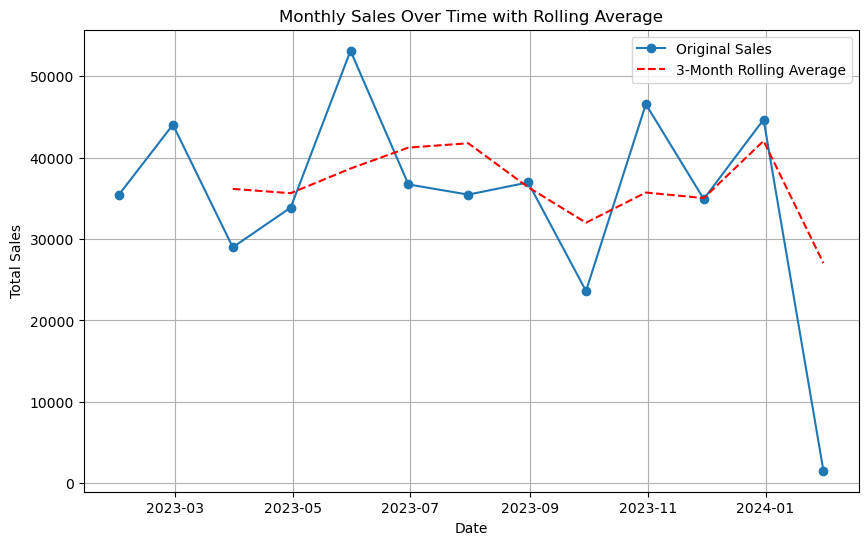

In [454]:
# Assuming 'Total Amount' is the correct column name
monthly_sales = data['Total Amount'].resample('M').sum()

# Create rolling average for 3 months
monthly_sales_rolling_avg = monthly_sales.rolling(window=3).mean()

# Plot the monthly sales with rolling average
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', label='Original Sales')
plt.plot(monthly_sales.index, monthly_sales_rolling_avg, linestyle='--', color='red', label='3-Month Rolling Average')

# Title and labels
plt.title('Monthly Sales Over Time with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()


### **4. Customer and Product Analysis**

**Purchase Frequency by Customer**  
To analyze customer purchasing behavior, we calculated how frequently customers buy products.


In [456]:
# Count purchase frequency per customer
purchase_frequency = data.groupby('Customer ID').size()

# Count how many times each customer bought a product
category_frequency = data.groupby(['Customer ID', 'Product Category']).size().unstack()

print(purchase_frequency.head())
print(category_frequency.head())

Customer ID
CUST001    1
CUST002    1
CUST003    1
CUST004    1
CUST005    1
dtype: int64
Product Category  Beauty  Clothing  Electronics
Customer ID                                    
CUST001              1.0       NaN          NaN
CUST002              NaN       1.0          NaN
CUST003              NaN       NaN          1.0
CUST004              NaN       1.0          NaN
CUST005              1.0       NaN          NaN


**Most Popular Product Category**  
We identified the most popular product categories using a pie chart




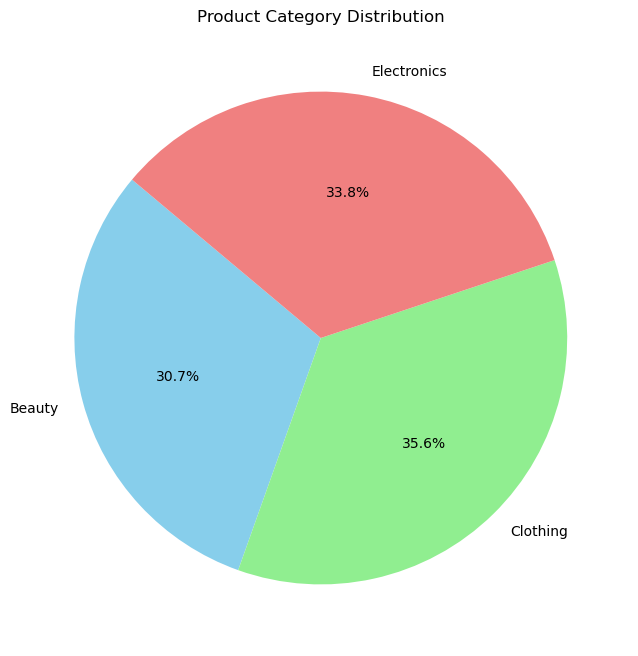

In [458]:
# Pie chart for product categories
product_sales = data.groupby('Product Category')['Quantity'].sum()
plt.figure(figsize=(8, 8))
plt.pie(product_sales, labels=product_sales.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Product Category Distribution')
plt.show()


### **5. Customer Demographics: Age and Gender**

**Potential Customer Analysis**  
To identify the most potential customers based on age and gender, we grouped data by age groups and gender.

C:\Users\esrae\AppData\Local\Temp\ipykernel_26716\20690278.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_counts = data.groupby(['Age Group', 'Gender'])['Customer ID'].nunique().unstack()


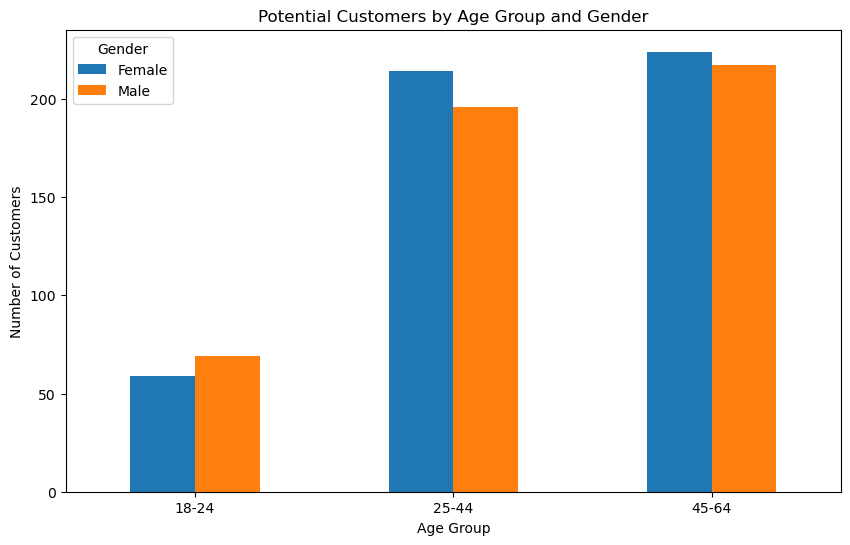

In [465]:
# Create age groups
data['Age Group'] = pd.cut(data['Age'], bins=[18, 24, 44, 64], labels=['18-24', '25-44', '45-64'])

# Group by age and gender
customer_counts = data.groupby(['Age Group', 'Gender'])['Customer ID'].nunique().unstack()

# Plot
customer_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Potential Customers by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()


**Total spending by gender.**

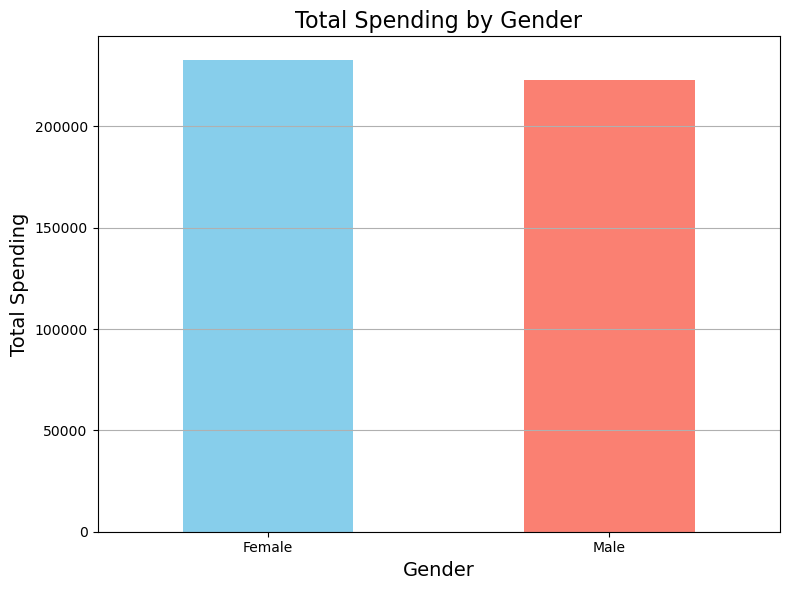

In [464]:

plt.figure(figsize=(8, 6))
total_spending_by_gender.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Total Spending by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Total Spending', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### **6. Heatmap for Correlations**

To understand the relationships between age, price, quantity, and total sales, we created a **correlation heatmap**.


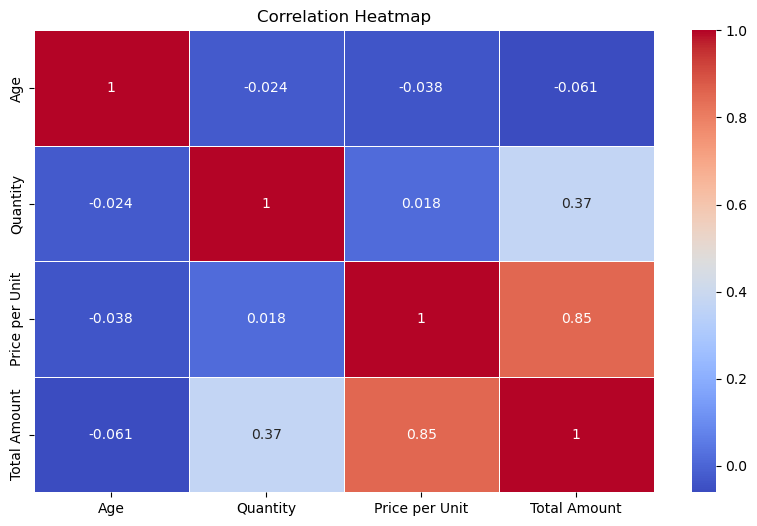

In [462]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### **7. Recommendations**

**Customer Targeting**:  
- Customers in the age group **25-44** show the highest purchasing behavior, especially for products in the **Beauty** and **Clothing** categories. Promotional efforts should focus on this demographic.

**Product Promotions**:  
- The **Clothing** category is a significant contributor to total sales, especially during mid-year months. Introducing seasonal promotions or discounts could drive additional revenue.

**Time-based Offers**:  
- By analyzing the rolling average of sales, you could introduce discounts during periods when sales tend to dip to maintain a steady flow of revenue throughout the year.



### **Conclusion**

In this analysis, we explored various aspects of the retail sales data, including customer behavior, product preferences, and sales trends over time. The insights provide actionable recommendations for targeted marketing, promotions, and product focus. The visualizations enhance the understanding of key patterns, making it easier to convey the findings to stakeholders.

